<a href="https://colab.research.google.com/github/NguyenTanPhats/baitap2_AI/blob/main/AI_baitap_W4_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


60.00000000000002


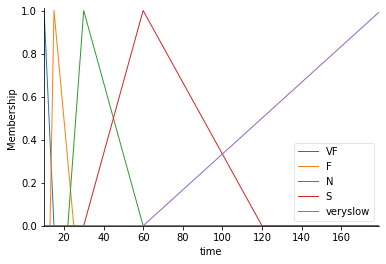

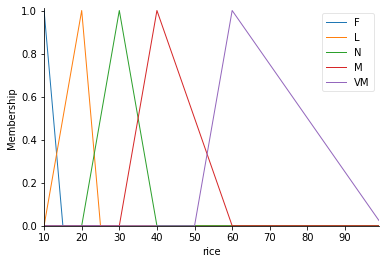

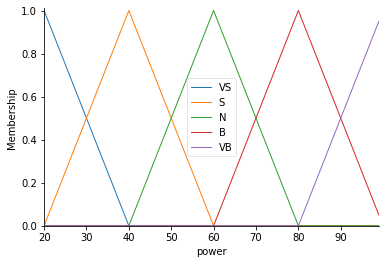

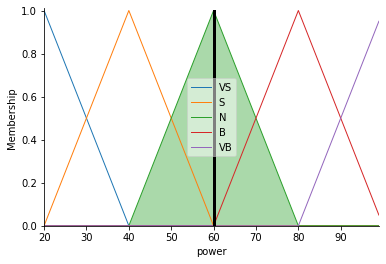

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
time= ctrl.Antecedent(np.arange(10,180,1),'time')
rice= ctrl.Antecedent(np.arange(10,100,1),'rice')
power = ctrl.Consequent(np.arange(20,100,1),'power')
time['VF']=fuzz.trimf(time.universe,[10,10,15])
time['F']=fuzz.trimf(time.universe,[13,15,25])
time['N']=fuzz.trimf(time.universe,[22,30,60])
time['S']=fuzz.trimf(time.universe,[30,60,120])
time['veryslow']=fuzz.trimf(time.universe,[60,180,180])

rice['F']=fuzz.trimf(rice.universe,[10,10,15])  
rice['L']=fuzz.trimf(rice.universe,[10,20,25])  
rice['N']=fuzz.trimf(rice.universe,[20,30,40])  
rice['M']=fuzz.trimf(rice.universe,[30,40,60])  
rice['VM']=fuzz.trimf(rice.universe,[50,60,100]) 

power['VS'] = fuzz.trimf(power.universe,[20,20,40])
power['S'] = fuzz.trimf(power.universe,[20,40,60])
power['N'] = fuzz.trimf(power.universe,[40,60,80])
power['B'] = fuzz.trimf(power.universe,[60,80,100])
power['VB'] = fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['VF'] & rice['F'], power['N'])
rule2 = ctrl.Rule(time['VF'] & rice['L'], power['B'])
rule3 = ctrl.Rule(time['VF'] & rice['N'], power['B'])
rule4 = ctrl.Rule(time['VF'] & rice['M'], power['VB'])
rule5 = ctrl.Rule(time['VF'] & rice['VM'], power['VB'])

rule6 = ctrl.Rule(time['F'] & rice['F'], power['N'])
rule7 = ctrl.Rule(time['F'] & rice['L'], power['N'])
rule8 = ctrl.Rule(time['F'] & rice['N'], power['B'])
rule9 = ctrl.Rule(time['F'] & rice['M'], power['B'])
rule10 = ctrl.Rule(time['F'] & rice['VM'], power['VB'])

rule11 = ctrl.Rule(time['N'] & rice['F'], power['S'])
rule12 = ctrl.Rule(time['N'] & rice['L'], power['N'])
rule13 = ctrl.Rule(time['N'] & rice['N'], power['N'])
rule14 = ctrl.Rule(time['N'] & rice['M'], power['B'])
rule15 = ctrl.Rule(time['N'] & rice['VM'], power['B'])

rule16 = ctrl.Rule(time['S'] & rice['F'], power['VS'])
rule17 = ctrl.Rule(time['S'] & rice['L'], power['S'])
rule18 = ctrl.Rule(time['S'] & rice['N'], power['N'])
rule19 = ctrl.Rule(time['S'] & rice['M'], power['N'])
rule20 = ctrl.Rule(time['S'] & rice['VM'], power['N'])

rule21 = ctrl.Rule(time['veryslow'] & rice['F'], power['VS'])
rule22 = ctrl.Rule(time['veryslow'] & rice['L'], power['S'])
rule23 = ctrl.Rule(time['veryslow'] & rice['N'], power['S'])
rule24 = ctrl.Rule(time['veryslow'] & rice['M'], power['N'])
rule25 = ctrl.Rule(time['veryslow'] & rice['VM'], power['N'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                               rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                              rule21,rule22,rule23,rule24,rule25 ])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']=30
powering.input['rice']=20
powering.compute()
print(powering.output['power'])
power.view(sim=powering)